In [175]:
import logging
from itertools import product
import matplotlib.pyplot as plt


def slice_(line, width):
    windows = [
        (i, line[i : i + width])
        for j in range(0, width)
        for i in range(j, len(line) - width + 1, width)
    ]

    dictionary = {}
    for i, window in windows:
        if window not in dictionary:
            dictionary[window] = [i]
        else:
            dictionary[window].append(i)
    return {key: sorted(value) for key, value in dictionary.items()}


def match(lhs, rhs, width):
    lhs_slice = slice_(lhs, width)
    rhs_slice = slice_(rhs, width)
    dictionary = {
        key: (value, rhs_slice[key])
        for key, value in lhs_slice.items()
        if key in rhs_slice
    }
    lhs_common, rhs_common = zip(*dictionary.values())
    return match_outer(lhs_common, rhs_common)


def match_outer(lhs, rhs):
    inner_matches = [match_inner(a, b) for a, b in zip(lhs, rhs)]
    lhs_inner, rhs_inner = zip(*inner_matches)
    return sum(lhs_inner, []), sum(rhs_inner, [])


def match_inner(lhs, rhs):
    combinations = product(lhs, rhs)
    a, b = zip(*combinations)
    return list(a), list(b)


def plot(x, y, lablex, labley, width):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(lablex)
    ax.set_ylabel(labley)
    ax.set_title(f"Dot plot with window size {width}")
    plt.show()


[5, 15, 20, 6, 16, 21, 2, 2, 2, 18, 18, 18, 31, 31, 31, 17, 22, 3, 3, 32, 32, 23, 4, 19]
[7, 17, 22, 8, 18, 23, 4, 20, 33, 4, 20, 33, 4, 20, 33, 19, 24, 5, 34, 5, 34, 25, 6, 21]


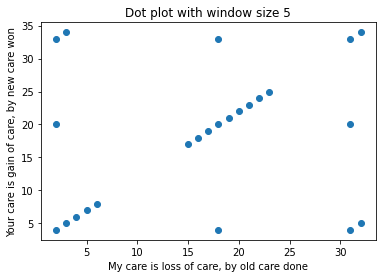

391
439


In [176]:
if __name__ == "__main__":
    logging.basicConfig(level=logging.INFO)

    line1 = "My care is loss of care, by old care done"
    line2 = "Your care is gain of care, by new care won"
    width = 5

    slice1 = slice_(line1, width)
    slice2 = slice_(line2, width)

    (x, y) = match(line1, line2, width)
    print(x)
    print(y)
    plot(x, y, line1, line2, width)
    print(sum(x))
    print(sum(y))
